## Gather

First, we will import all libraries required for this project first

In [661]:
import json
import time
import tweepy
import requests
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

%matplotlib inline  

We will use data in two files 'twitter_archive_enhanced.csv' which is data collected from the WeRateDogs Twitter archive, and 'image_predictions.tsv' which is the tweet image predictions data.

'twitter_archive_enhanced.csv' is already provided and uploaded to the Project Workspace and we directly import this data to a panda dataframe "df_twitter".

In [662]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [663]:
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [664]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

However, the file 'image_predictions.tsv' needs to be downloaded programmatically.

We will download this file from a given url and write it to the Project Workspace. Then, we will import this tweeter image predictions data to a new dataframe "df_predict"


In [665]:
url_tsv = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
filename_tsv = 'image_predictions.tsv'

r = requests.get(url_tsv) # create HTTP response object

# send a HTTP request to the server and save
# the HTTP response in a response object called r
with open(filename_tsv,'wb') as f:
 
    # Saving received content as a png file in
    # binary format
 
    # write the contents of the response (r.content)
    # to a new file in binary mode.
    f.write(r.content)

In [666]:
df_predict = pd.read_table(filename_tsv)

In [667]:
df_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [668]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


For each tweet id, we need addiotional tweet data such as  tweet's retweet count, favorite ("like") count etc.

Since the tweet ids are already available in the df_tweet dataframe, we will query tweeter data of those tweet ids using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.

I have already done this process offline using the commented code below and uploaded the file 'tweet_json.txt' to the Project Workspace

In [669]:
# Get a list of all tweet ids in df_twitter
tweet_ids = df_twitter.tweet_id

# File name that we will write the additional tweet data for each twitter id
filename_txt = 'tweet_json.txt'

In [670]:
# # --- First, Instantiate a Tweepy api object
# consumer_key = 'myCustomerKey'
# consumer_secret = 'myCustomerSecret'
# access_token = 'myAccessToken'
# access_secret = 'myAccessSecret'

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# # Set wait_on_rate_limit to automatically wait for rate limits to replenish
# # Set wait_on_rate_limit_notify to print a notification when Tweepy is waiting for rate limits to replenish
# api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [671]:
# # --- Then, loop through all twitter ids, and get a json data of each id
# # and save it to the 'tweet_json.txt' where a line break is used to seperate
# # data of each id

# with open(filename_txt, 'w') as outfile: 

#     for id_of_tweet in tweet_ids:
#         print('*******************')
#         print('|---- Current id: {}'.format(id_of_tweet))
    
#         try:
#             # Get status of the current tween id
#             print('Get twitter status')
#             start = time.time()
#             tweet = api.get_status(id_of_tweet, tweet_mode='extended')
#             end = time.time()
#             print('Query time: {} seconds'.format(end - start))

#             # Wring _json data to a new line
#             json.dump(tweet._json, outfile)
#             print('Finish writing json to a new line')
#             outfile.write("\n")
#         except:
#             print('(SKIPPED) This id is no longer available!')

After that, we will read the 'tweet_json.txt' file line by line and create a new dataframe 'df_count_data' which contains tweet ID, retweet count, and favorite count

In [672]:
# First, we need to read the 'tweet_json.txt' file line by line to get
# json data of each id

with open(filename_txt) as f:
    json_contents = f.readlines()

In [673]:
# Then, convert each json data to a dictionary and add to 
# a list 'list_twitter_count_data'
# Since we are only interested in 'tweet_id', 'retweet_count', and 'favorite_count',
# we will create a new dictionary only with those fields for each tweet_id 
# and append it to the 'list_twitter_count_data' list

list_twitter_count_data = []

for cur_json in json_contents:
    # Need to remove a line break at the end of each line before converting to a dictionary
    cur_json = cur_json.strip()
    
    # Convert a json to a dictionary
    dictdump = json.loads(cur_json)
    list_twitter_count_data.append({
        'tweet_id': dictdump['id'], 
        'retweet_count': dictdump['retweet_count'], 
        'favorite_count': dictdump['favorite_count']
    })

In [674]:
# Next, create a new dataframe 'df_count_data' from the newly created list 
# 'list_twitter_count_data'

df_count_data = pd.DataFrame(list_twitter_count_data)

# Rearrange the columns
df_count_data = df_count_data[ ['tweet_id', 'retweet_count', 'favorite_count'] ] 

In [675]:
df_count_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8541,38632
1,892177421306343426,6284,33114
2,891815181378084864,4162,24926
3,891689557279858688,8673,42023
4,891327558926688256,9423,40178


In [676]:
df_count_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 3 columns):
tweet_id          2343 non-null int64
retweet_count     2343 non-null int64
favorite_count    2343 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


## Assess

In [677]:
# Inspect df_twitter
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [678]:
# Inspect data types of data in the df_twitter table
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [679]:
# Inspect frequencies of values in the name column
df_twitter.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Cooper         11
Lucy           11
Penny          10
Lola           10
Tucker         10
Bo              9
Winston         9
the             8
Sadie           8
Toby            7
an              7
Bailey          7
Buddy           7
Daisy           7
Jax             6
Bella           6
Dave            6
Scout           6
Milo            6
Rusty           6
Stanley         6
Leo             6
Oscar           6
Jack            6
Koda            6
Bentley         5
             ... 
Harlso          1
Goose           1
Darrel          1
Taco            1
Jazz            1
Meera           1
Pumpkin         1
Augie           1
Billy           1
Storkson        1
Hubertson       1
Mojo            1
Duchess         1
Maude           1
Barney          1
Aja             1
Alf             1
Lilah           1
Marty           1
Trigger         1
Ridley          1
General         1
Hall            1
Karma           1
Cora      

In [680]:
# Get a sorted list of all values in the name column
allNames = df_twitter.name.sort_values()

In [681]:
# Find unique names. Any name that start with a lower case is likely be unexpected
np.unique(allNames)

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose',
       'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna',
       'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo',
       'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen',
       'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava',
       'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo', 'Barclay',
       'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter', 'Bayley',
       'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell',
       'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley',
       'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya',
       'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick',
       'Blakely', 'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu',

In [682]:
# Inspect samples of data in the df_twitter
df_twitter.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2249,667861340749471744,NaN,NaN,2015-11-21 00:25:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Shotokon Macadamia mix named Cheryl....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667861340...,9,10,a,None,None,None,None
2217,668528771708952576,NaN,NaN,2015-11-22 20:37:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gòrdón. He enjoys his razberrita by po...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668528771...,12,10,Gòrdón,None,None,None,None
1177,719704490224398336,NaN,NaN,2016-04-12 01:51:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clyde. He's making sure you're having ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719704490...,12,10,Clyde,None,None,pupper,None
2126,670338931251150849,NaN,NaN,2015-11-27 20:30:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Butters. He's not ready for Thanksgivi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670338931...,10,10,Butters,None,None,None,None
1995,672594978741354496,NaN,NaN,2015-12-04 01:55:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scott. Just trying to catch his train to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672594978...,9,10,Scott,None,None,pupper,None
1071,740214038584557568,NaN,NaN,2016-06-07 16:09:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is getting incredibly frustrating. This i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740214038...,10,10,getting,None,None,None,None
535,807059379405148160,NaN,NaN,2016-12-09 03:08:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Cali. She arrived preas...,7.829691e+17,4.196984e+09,2016-10-03 15:42:44 +0000,https://twitter.com/dog_rates/status/782969140...,12,10,Cali,None,None,None,None
2176,669203728096960512,NaN,NaN,2015-11-24 17:19:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Samsom. He is sexually confused. Reall...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669203728...,9,10,Samsom,None,None,None,None
1967,673342308415348736,NaN,NaN,2015-12-06 03:24:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Django. He's a skilled assassin pupper...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673342308...,10,10,Django,None,None,pupper,None
1066,740699697422163968,NaN,NaN,2016-06-09 00:19:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chip. He only mowed half the yard. 8/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740699697...,8,10,Chip,None,None,None,None


In [683]:
# Inspect the df_predict table
df_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [684]:
# Inspect data types of data in the df_predict table

df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [685]:
# Inspect frequencies of values in the p1 column
df_predict.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
web_site                      19
Cardigan                      19
Shetland_sheepdog             18
Eskimo_dog                    18
Maltese_dog                   18
teddy                         18
beagle                        18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [686]:
# Inspect the df_count_data table
df_count_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8541,38632
1,892177421306343426,6284,33114
2,891815181378084864,4162,24926
3,891689557279858688,8673,42023
4,891327558926688256,9423,40178


In [687]:
# Inspect data types of data in the df_count_data table

df_count_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 3 columns):
tweet_id          2343 non-null int64
retweet_count     2343 non-null int64
favorite_count    2343 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


#### Quality

##### `df_twitter` table

- source column should only contain text inside the "a" element
- source column should be of type 'category'
- timestamp and retweeted_status_timestamp should be of type datetime
- Columns for the various stages of dog: doggo, floofer, pupper, and puppo should hold a boolean data type
- expanded_urls should contain a list of urls and not a single string for multiple urls and they should not be duplicated
- Some tweets with no dog names has unexpected dog name such as 'a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very', and 'None'

##### `df_predicts` table
- Name of the prediction should be all lowercase to make them consistent
- p1, p2, p3 should be of type 'category'

#### Tidiness
- The doggo, floofer, pupper, and puppo columns for the various stages of dog should be reshaped into a single column 'stage_of_dog'
- `df_predict` and  `df_count_data` should be part of the `df_twitter` table



## Clean

In [688]:
df_twitter_clean = df_twitter.copy()
df_predict_clean = df_predict.copy()
df_count_data_clean = df_count_data.copy()

### Quality

#### `df_twitter`: source column should only contain text inside the a element

##### Define
Extract the innerText of the a element in the source column using a regular expression and pandas' str.extract method. Drop the contact column when done.

##### Code

In [689]:
# Extract the innerText using a regular expression
df_twitter_clean['source_name'] = df_twitter_clean.source.str.extract('>(.*)</a>', expand=True)

# Note: axis=1 denotes that we are referring to a column, not a row
df_twitter_clean = df_twitter_clean.drop('source', axis=1)

##### Test

In [690]:
# Confirm that the source column is gone
list(df_twitter_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'source_name']

In [691]:
# Verify that only the innerText inside the a element is added to the source_name column
df_twitter_clean.source_name.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source_name, dtype: int64

#### `df_twitter`: timestamp column should be of type datetime

##### Define
Since we already extracted the source name from the source column and dropped the source column, we will convert the source_name column to categorical data type instead

##### Code

In [692]:
# To category
df_twitter_clean.source_name = df_twitter_clean.source_name.astype('category')

##### Test

In [693]:
# Confirm that the source_name is of type 'category'
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
source_name                   2356 non-null category
dtypes: category(1), float64(4

#### `df_twitter`:  timestamp and retweeted_status_timestamp should be of type datetime

##### Define
Convert the 'timestamp' and 'retweeted_status_timestamp' columns to the datetime type

##### Code

In [694]:
# To datetime
df_twitter_clean.timestamp = pd.to_datetime(df_twitter_clean.timestamp)
df_twitter_clean.retweeted_status_timestamp = pd.to_datetime(df_twitter_clean.retweeted_status_timestamp)

##### Test

In [695]:
# Confirm that the timestamp and retweeted_status_timestamp is of type 'datetime'
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
source_name                   2356 non-null category
dtypes: catego

#### `df_twitter`:  Columns for the various stages of dog: doggo, floofer, pupper, and puppo should hold a boolean data type

##### Define

For the 'doggo', 'floofer', 'pupper', 'puppo' columns, convert the string 'None' to a boolean value False, and covert 'doggo', 'floofer', 'pupper', 'puppo' to True

##### Code

In [696]:
# Create a mapping before convert a string to a boolean value

d = {'doggo': True, 'floofer': True, 'pupper': True, 'puppo': True, 'None': False}

# Then, map all values in the 'doggo', 'floofer', 'pupper', 'puppo' columns to boolean values
df_twitter_clean['doggo'] = df_twitter_clean['doggo'].map(d)
df_twitter_clean['floofer'] = df_twitter_clean['floofer'].map(d)
df_twitter_clean['pupper'] = df_twitter_clean['pupper'].map(d)
df_twitter_clean['puppo'] = df_twitter_clean['puppo'].map(d)

##### Test

In [697]:
# Confirm that the 'doggo', 'floofer', 'pupper', 'puppo' are of type 'boolean'
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null bool
floofer                       2356 non-null bool
pupper                        2356 non-null bool
puppo                         2356 non-null bool
source_name                   2356 non-null category
dtypes: bool(4), categ

In [698]:
df_twitter_clean.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_name
584,800141422401830912,NaN,NaN,2016-11-20 00:59:15,This is Peaches. She's the ultimate selfie sid...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/800141422...,13,10,Peaches,False,False,False,False,Twitter for iPhone
1432,697482927769255936,NaN,NaN,2016-02-10 18:11:03,Meet Blipson. He's a Doowap Hufflepuff. That U...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/697482927...,11,10,Blipson,False,False,False,False,Twitter for iPhone
2191,668955713004314625,NaN,NaN,2015-11-24 00:54:05,This is a Slovakian Helter Skelter Feta named ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/668955713...,10,10,a,False,False,False,False,Twitter for iPhone
1880,675006312288268288,NaN,NaN,2015-12-10 17:37:00,Say hello to Mollie. This pic was taken after ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/675006312...,10,10,Mollie,False,False,True,False,Twitter for iPhone
183,856543823941562368,NaN,NaN,2017-04-24 16:22:16,This is Callie. She'll be your navigator today...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/856543823...,12,10,Callie,False,False,False,False,Twitter for iPhone
826,769335591808995329,NaN,NaN,2016-08-27 00:47:53,RT @dog_rates: Ever seen a dog pet another dog...,7.069045e+17,4.196984e+09,2016-03-07 18:09:06,"https://vine.co/v/iXQAm5Lrgrh,https://vine.co/...",13,10,None,False,False,False,False,Twitter for iPhone
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24,RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57,https://twitter.com/dog_rates/status/859196978...,12,10,quite,False,False,False,False,Twitter for iPhone
1572,687664829264453632,NaN,NaN,2016-01-14 15:57:26,Meet Opal. He's a Belgian Dijon Poofster. Upse...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/687664829...,11,10,Opal,False,False,False,False,Twitter for iPhone
988,748977405889503236,NaN,NaN,2016-07-01 20:31:43,What jokester sent in a pic without a dog in i...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/748977405...,10,10,not,False,False,False,False,Twitter for iPhone
579,800513324630806528,NaN,NaN,2016-11-21 01:37:04,This is Chef. Chef loves everyone and wants ev...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/800513324...,11,10,Chef,False,False,False,False,Twitter for iPhone


#### `df_twitter`:  expanded_urls should contain a list of urls and not a single string for multiple urls and they should not be duplicated

##### Define

Split the expanded_urls column using the ',' as a delimiter and only store a unique value in the 'expanded_urls_list' column. Then, drop the 'expanded_urls' column.

##### Code

In [699]:
df_twitter_clean['expanded_urls_list'] = df_twitter_clean.expanded_urls.str.split(',').apply(np.unique)

# Note: axis=1 denotes that we are referring to a column, not a row
df_twitter_clean = df_twitter_clean.drop('expanded_urls', axis=1)

##### Test

In [700]:
# Confirm that the expanded_urls column is gone
list(df_twitter_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'source_name',
 'expanded_urls_list']

In [701]:
# Inspect samples of values in the 'expanded_urls_list'
df_twitter_clean['expanded_urls_list'].sample(25)

2120    [https://twitter.com/dog_rates/status/67041137...
1537    [https://twitter.com/dog_rates/status/68987768...
2124    [https://twitter.com/dog_rates/status/67037437...
1299                      [https://vine.co/v/hUvHKYrdb1d]
367     [https://twitter.com/dog_rates/status/82877034...
2316    [https://twitter.com/dog_rates/status/66664948...
1043    [https://twitter.com/dog_rates/status/66713826...
1901    [https://twitter.com/dog_rates/status/67464639...
440     [https://twitter.com/dog_rates/status/81992419...
2092    [https://twitter.com/dog_rates/status/67078242...
616     [https://twitter.com/dog_rates/status/79648482...
168     [https://twitter.com/dog_rates/status/85960781...
452     [https://twitter.com/dog_rates/status/81861449...
263     [https://twitter.com/dog_rates/status/84253559...
2347    [https://twitter.com/dog_rates/status/66605709...
126     [https://twitter.com/dog_rates/status/86855227...
1362    [https://twitter.com/dog_rates/status/70304194...
557     [https

#### `df_twitter`:  Some tweets with no dog names has unexpected dog name such as 'a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very', and 'None'

##### Define

Replace the unexpected dog names 'a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very', and 'None' with an empty string

##### Code

In [702]:
# First, create a list of unexpected strings 
unexpectedStr = ['a', 'actually', 'all', 'an', 
                 'by', 'getting', 'his', 'incredibly', 
                 'infuriating', 'just', 'life', 'light', 
                 'mad', 'my', 'not', 'officially', 
                 'old', 'one', 'quite', 'space', 
                 'such', 'the', 'this', 'unacceptable', 
                 'very', 'None']

# Then, replace a name that matches any name in the list unexpectedStr with an empty string
df_twitter_clean['name'] = df_twitter_clean['name'].apply(lambda x: '' if x in unexpectedStr else x)

##### Test

In [703]:
# Get a list of all unique names and confirm that there are no names that start with a lowercase
newNameList = df_twitter_clean.name
np.unique(newNameList)

array(['', 'Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose',
       'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna',
       'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo',
       'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen',
       'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava',
       'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo', 'Barclay',
       'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter', 'Bayley',
       'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell',
       'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley',
       'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya',
       'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick',
       'Blakely', 'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'B

In [704]:
# Then, Inspect value counts of the name column

df_twitter_clean.name.value_counts()

              854
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Penny          10
Tucker         10
Lola           10
Bo              9
Winston         9
Sadie           8
Daisy           7
Buddy           7
Bailey          7
Toby            7
Bella           6
Scout           6
Koda            6
Rusty           6
Dave            6
Leo             6
Oscar           6
Jack            6
Milo            6
Stanley         6
Jax             6
Larry           5
Alfie           5
Oakley          5
Sammy           5
             ... 
Goose           1
Darrel          1
Taco            1
Jazz            1
Kaia            1
Liam            1
Sully           1
Meera           1
Pumpkin         1
Augie           1
Hubertson       1
Mojo            1
Duchess         1
Maude           1
Barney          1
Aja             1
Alf             1
Lilah           1
Billy           1
Marty           1
Ridley          1
General         1
Hall            1
Karma           1
Opie      

#### `df_predicts`:  Name of the prediction should be all lowercase to make them consistent

##### Define

Convert strings in the p1, p2, p3 columns to all lowercase

##### Code

In [705]:
df_predict_clean.p1 = df_predict_clean.p1.str.lower()
df_predict_clean.p2 = df_predict_clean.p2.str.lower()
df_predict_clean.p3 = df_predict_clean.p3.str.lower()

##### Test

In [706]:
# Inspect values in the p1, p2, p3 columns
df_predict_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### `df_predicts`:  p1, p2, p3 should be of type 'category'

##### Define

Convert the p1, p2, p3 columns to a categorical column

##### Code

In [707]:
# To category
df_predict_clean.p1 = df_predict_clean.p1.astype('category')
df_predict_clean.p2 = df_predict_clean.p2.astype('category')
df_predict_clean.p3 = df_predict_clean.p3.astype('category')

##### Test

In [708]:
# Check a type of the p1, p2, p3 columns
df_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 174.9+ KB


In [709]:
df_predict_clean.p3.value_counts()

labrador_retriever                79
chihuahua                         58
golden_retriever                  48
eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
pomeranian                        29
toy_poodle                        29
pekinese                          29
pembroke                          27
great_pyrenees                    27
chesapeake_bay_retriever          27
french_bulldog                    26
malamute                          26
american_staffordshire_terrier    24
pug                               23
cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
siberian_husky                    19
shetland_sheepdog                 17
boston_bull                       17
d

### Tidiness

#### `df_twitter`:  The doggo, floofer, pupper, and puppo columns for the various stages of dog should be reshaped into a single column 'stage_of_dog'

##### Define

Check the boolean values in the doggo, floofer, pupper, and puppo columns and set a name of a stage of dogs based on those boolean values in the 'stage_of_dog' column. Use the string 'none' if all columns contains a boolean value False.
Then, convert this column to a categorical type and drop the doggo, floofer, pupper, and puppo columns

##### Code

In [710]:
# Create a new column 'stages_of_dog'

col_names = ['doggo', 'floofer', 'pupper', 'puppo']

for cur_col in col_names:
    df_twitter_clean.loc[df_twitter_clean[cur_col], 'stage_of_dog' ] = cur_col
    
# Fill NaN with the string 'none'
df_twitter_clean.stage_of_dog = df_twitter_clean.stage_of_dog.fillna('none')

In [711]:
# Convert the 'stage_of_dog' column to a categorical type

df_twitter_clean.stage_of_dog = df_twitter_clean.stage_of_dog.astype('category')

In [712]:
# Drop the doggo, floofer, pupper, and puppo columns 

# Note: axis=1 denotes that we are referring to a column, not a row
df_twitter_clean = df_twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

##### Test

In [713]:
# Check a list of column names
list(df_twitter_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'rating_numerator',
 'rating_denominator',
 'name',
 'source_name',
 'expanded_urls_list',
 'stage_of_dog']

In [714]:
# Check a type of the stage_of_dog column
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
source_name                   2356 non-null category
expanded_urls_list            2356 non-null object
stage_of_dog                  2356 non-null category
dtypes: category(2), datetime64[ns](2), float64(4), int64(3), object(3)
memory usage: 225.9+ KB


In [715]:
# Inspect value counts of the stage_of_dog column
df_twitter_clean.stage_of_dog.value_counts()

none       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: stage_of_dog, dtype: int64

In [716]:
df_twitter_clean.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,source_name,expanded_urls_list,stage_of_dog
1933,674019345211760640,NaN,NaN,2015-12-08 00:15:09,This is Acro. You briefly see her out of the c...,NaN,NaN,NaT,10,10,Acro,Twitter for iPhone,[https://twitter.com/dog_rates/status/67401934...,none
1239,712092745624633345,NaN,NaN,2016-03-22 01:45:15,This is Steven. He's inverted af. Also very he...,NaN,NaN,NaT,7,10,Steven,Twitter for iPhone,[https://twitter.com/dog_rates/status/71209274...,none
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19,This is Mo. No one will push him around in the...,NaN,NaN,NaT,11,10,Mo,Twitter for iPhone,[https://twitter.com/dog_rates/status/82587651...,none
2185,668986018524233728,NaN,NaN,2015-11-24 02:54:30,This is Ruby. She's a Bimmington Fettuccini. O...,NaN,NaN,NaT,9,10,Ruby,Twitter for iPhone,[https://twitter.com/dog_rates/status/66898601...,none
1411,698989035503689728,NaN,NaN,2016-02-14 21:55:47,This is Oliver. He does toe touches in his sle...,NaN,NaN,NaT,13,10,Oliver,Twitter for iPhone,[https://twitter.com/dog_rates/status/69898903...,none
642,793210959003287553,NaN,NaN,2016-10-31 22:00:04,This is Maude. She's the h*ckin happiest wasp ...,NaN,NaN,NaT,10,10,Maude,Twitter for iPhone,[https://twitter.com/dog_rates/status/79321095...,none
248,845397057150107648,NaN,NaN,2017-03-24 22:08:59,Say hello to Mimosa. She's an emotional suppor...,NaN,NaN,NaT,13,10,Mimosa,Twitter for iPhone,[https://twitter.com/dog_rates/status/84539705...,doggo
1726,680055455951884288,NaN,NaN,2015-12-24 16:00:30,"Meet Sammy. At first I was like ""that's a snow...",NaN,NaN,NaT,10,10,Sammy,TweetDeck,[https://twitter.com/dog_rates/status/68005545...,none
1681,681981167097122816,NaN,NaN,2015-12-29 23:32:35,This is Jimothy. He's a Trinidad Poliwhirl. Fa...,NaN,NaN,NaT,12,10,Jimothy,Twitter for iPhone,[https://twitter.com/dog_rates/status/68198116...,none
884,760190180481531904,NaN,NaN,2016-08-01 19:07:17,Meet Sadie. She's addicted to balloons. It's t...,NaN,NaN,NaT,10,10,Sadie,Twitter for iPhone,[https://twitter.com/dog_rates/status/76019018...,none


####  `df_predict` and  `df_count_data` should be part of the `df_twitter` table

##### Define
Merge the *df_predict* and *df_count_data* columns to the `df_twitter` table, joining on *tweet_id*.

##### Code

In [717]:
df_twitter_clean = pd.merge(df_twitter_clean, df_count_data_clean,
    on=['tweet_id'], how='left')

In [718]:
df_twitter_clean = pd.merge(df_twitter_clean, df_predict_clean,
    on=['tweet_id'], how='left')

##### Test

In [719]:
# Confirm a list of columns
list(df_twitter_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'rating_numerator',
 'rating_denominator',
 'name',
 'source_name',
 'expanded_urls_list',
 'stage_of_dog',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [720]:
# Inspect info of all columns
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
source_name                   2356 non-null category
expanded_urls_list            2356 non-null object
stage_of_dog                  2356 non-null category
retweet_count                 2343 non-null float64
favorite_count                2343 non-null float64
jpg_url                       2075 non-null object
img_num   

## Store data

After cleaning the data, we will store the clean dataframe i a CSV file named 'twitter_archive_master.csv'

In [721]:
filename_master = 'twitter_archive_master.csv'
df_twitter_clean.to_csv(filename_master, index=False)

## Analysis and Visualization

### Where were tweets created from?

The value_counts and histogram plot of the 'source_name' column shows that most of the tweets were created from 'Twitter for iPhone'

In [722]:
df_twitter_clean.source_name.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source_name, dtype: int64

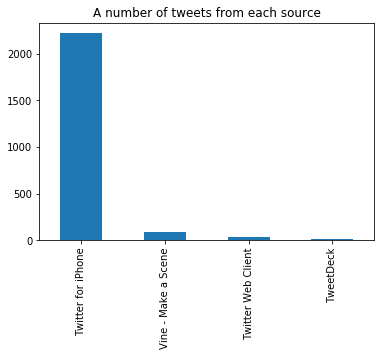

In [723]:
df_twitter_clean.source_name.value_counts().plot(kind='bar');
plt.title('A number of tweets from each source');

### How many tweets were created weekly?

The scatter plot shows that there are a lot of tweets created at the beginning of this archived data (above 100 during November and December 2015) and a number of tweets was exponentially reduced and the median value of a number of tweets crated weekly is around 18

In [724]:
#First, we need to resample the timestamp column by Weeks, get count and create df
df = df_twitter_clean.resample('W', on='timestamp').size().to_frame('count')

In [725]:
# Get descriptive statistics and generage a box plot
df.describe()

,count
count,91.000000
mean,25.890110
std,25.390484
min,3.000000
25%,14.000000
50%,18.000000
75%,25.500000
max,142.000000


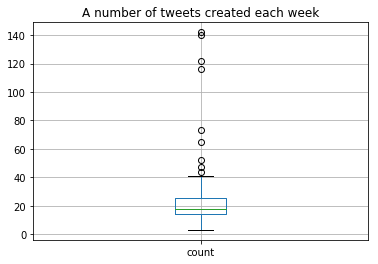

In [726]:
df.boxplot();
plt.title('A number of tweets created each week');

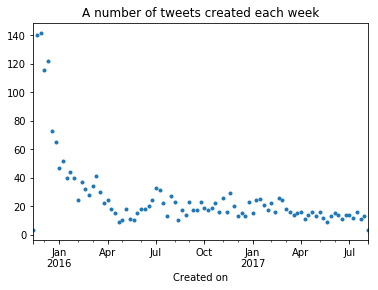

In [727]:
# Create a scatter plot
df.plot(y='count', style=".", legend=False);
plt.title('A number of tweets created each week');
plt.xlabel('Created on');

### Relationship between favorite_count and retweet_count with various stages of dog

Most of tweets do not mention a stage of dog

In [728]:
df_twitter_clean['stage_of_dog'].value_counts()

none       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: stage_of_dog, dtype: int64

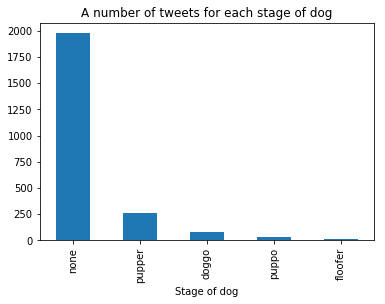

In [729]:
df_twitter_clean['stage_of_dog'].value_counts().plot.bar();
plt.title('A number of tweets for each stage of dog');
plt.xlabel('Stage of dog');

- The scatter plot below shows that the favorite_count of tweets have a strong relationship with the retweet_count where a number of retweet_count is increased when a number of favorite_count is increased.
- However, there are handful of tweets where favorite_count = 0 but have a large number of retweet_count
- Stage of dogs mentioned in a tweet does not seem to have any impact on a relationship bewteen favorite_count with retweet_count based on the scatter plot below


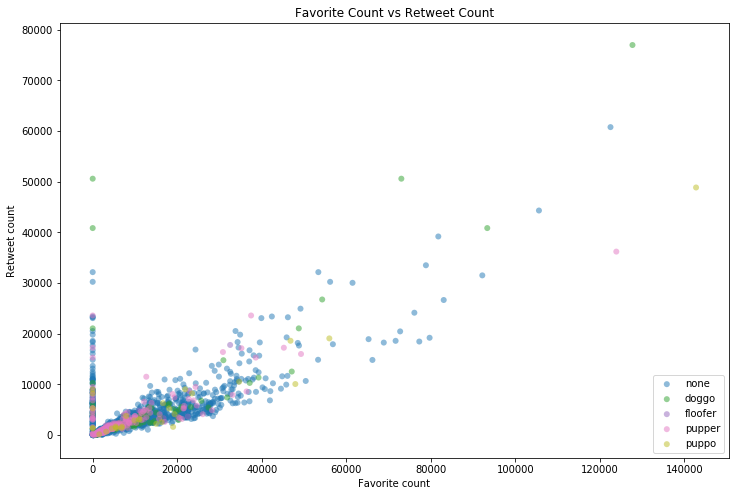

In [730]:
# All category names of stage_of_dog
uniq =  ['none', 'doggo', 'floofer', 'pupper', 'puppo']

# Set the color map to match the number of stage_of_dog
z = range(1,len(uniq))
hot = plt.get_cmap('tab10')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

plt.figure(figsize=(12, 8))
# Plot a scatterplot of each category and overlay all plots in the same figure
for i in range(len(uniq)):
    indx = df_twitter_clean['stage_of_dog'] == uniq[i]
    plt.scatter(
        df_twitter_clean['favorite_count'][indx], 
        df_twitter_clean['retweet_count'][indx], 
        color=scalarMap.to_rgba(i), 
        label=uniq[i], 
        edgecolor='none',
        alpha=0.5);

plt.xlabel('Favorite count');
plt.ylabel('Retweet count');
plt.title('Favorite Count vs Retweet Count');
plt.legend(loc='lower right');

plt.show()